# Machine Project 3: Loan Analysis

#### <span style="color:red">Make sure to read the [README](README.md) before starting this project</span>

## Required Information

Please fill out the following details.  
- Enter your **full name (as it appears on Canvas)** and **NetID**.  
- If you are working in a group (maximum of 4 members), include the **full names and NetIDs** of all your partners.  
- If you're working alone, enter `None` for the partner fields.

> **Important:** Each student must submit the project individually.  
Failure to complete this section may result in your submission being flagged for plagiarism.

In [1]:
# Project: MP3
# Student 1: Vardaan Kapoor, vkapoor5

## <span style="color:red">Important:</span>

* **Before you begin**, make sure to `pull` any changes from GitLab. From the terminal, run:
```
git checkout main
git pull
git checkout MP3
git merge main
```
* Follow all instructions carefully. If anything is unclear, attend office hours or post on Piazza.
* You may add additional code cells as needed. However, **only cells with `#Q_` in the code will be graded**.
* To test, **Restart and Run all Cells** then **save the notebook** and run `python3 tester.py` from the terminal

> ⚠️ **Reminders:**
>
> - Make sure you are on the `MP3` branch by running `git branch` and checking the output.
> - Frequently `add`, `commit`, and `push` your code to avoid losing progress.


In [2]:
# Add additional imports used throughout the project here

# these lines automatically reload modules when their code changes
%load_ext autoreload
%autoreload 2

import pickle # used for grading graphs
from loans import Applicant
from loans import Bank
from loans import Loan
from search import Node,BST
import time
from collections import Counter
import matplotlib.pyplot as plt

# Group Part (75%)

For this portion of the machine project, you may collaborate with your group members in any way (including looking at group members' code). You may also seek help from CS 320 course staff (peer mentors, TAs, and the instructor). You **may not** seek or receive help from other CS 320 students (outside of your group) or anybody else outside of the course.

## Part 1: Loan Classes
> 📄 **Work in:** [`loans.py`](loans.py)

For part 1 of this machine project, you will be working to create custom classes for handling data related to loans. These classes will allow us to easily take in large amounts of data and format it in a way that is easy for us to work with and analyze. 

To begin, finish the `Applicant` and `Loan` classes from [Lab 3](../../labs/Lab3/README.md) (if you haven't already done so). These classes hold data about people who apply to loans and other data related to loans respectively.

We'll now add a `Bank` class to `loans.py` file that can keep track of some bank information as well as a list of `Loan` objects that are tied to this bank.  A `Bank` object can be created like this (create a class with the necessary constructor for this to work):

```python
lcu = loans.Bank("Landmark Credit Union")
```

### banks.json

The `__init__` of your `Bank` class should check that the given name appears in the `banks.json` file.  If it does, the `__init__` should also lookup the `lei` ("Legal Entity Identifier") corresponding to the name and store that in an `lei` attribute.  In other words, `lcu.lei` should give the LEI for LCU, in this case "549300KY533JFETOYG46".

**Note**: Try to avoid reading in the `banks.json` file each time you create a new `Bank` object. Instead, try defining it outside of the `Bank` class to optimize the creation of new `Bank` objects.

### wi.zip

The `__init__` should also iterate over the loan data from the CSV inside of `wi.zip` and either skip the loan data if the `lei` doesn't match that of the `Bank` object, or create a `Loan` object from the loan data if the `lei` does match and append it to a list that is stored as an attribute in the `Bank` object called `loan_list`. For example, someone should be able to call `lcu.loan_list` to get a list of all of the `Loan` objects that have the same `lei` as the `Bank` object we created above.

You already learned how to read text from a zip file in lab using `TextIOWrapper` and the `zipfile` module. Read the documentation and example for how to read CSV files with `DictReader` here: https://docs.python.org/3/library/csv.html#csv.DictReader.  You can combine this with what you learned about zipfiles.  When you create a `DictReader`, just pass in a `TextIOWrapper` object instead of a regular file object.

### Special Methods

Using this new `loan_list` attribute, you are able to print the last loan for this `Bank` object using:

```python
print(lcu.loan_list[-1])
```

And we can check how many loans there are associated with this `Bank` object using:

```python
print(len(lcu.loan_list))
```

For convenience, we want to be able to directly use brackets and `len` directly on `Bank` objects, like this:
* `lcu[-1]`
* `len(lcu)`

Add the special methods to `Bank` necessary to make the above two lines of code work.

## Testing

Running `python3 tester.py` does two things:

1. Compute a score based on whether answers in your `mp3.ipynb` are correct.
2. Get a second score by running `module_tester.py`, which exercises various classes/methods in `loan.py` (already done) and `search.py` (the next part)

Your total score is an average of these two components.

Try running `python3 module_tester.py` now.  You should see the following (assuming you haven't worked ahead on `search.py`):

```
{'score': 40.0, 'errors': ['could not find search module']}
```

It should actually be possible to get 50.0 from `module_tester.py`
after just completing `loans.py`, but we left some tests undone so you
can get practice writing tests for yourself.

Open `module_tester.py` and take a look at the `loans_test`.  The
function tries different things (e.g., creating different `Loan` and
`Applicant` objects and calling various methods).

Whenever something works, a global variable `loans_points` is
increased.  There are also asserts, and if any fail, the test stops
giving points.  For example, here's a bit that tests the `lower_age`
method:

```python
    # lower_age
    assert loans.Applicant("<25", []).lower_age() == 25
    assert loans.Applicant("20-30", []).lower_age() == 20
    assert loans.Applicant(">75", []).lower_age() == 75
    loans_points += 1
```

### Requirement: Additional tests in `module_tester.py`
You should add some additional test code of your choosing 
(based on where you think bugs are most likely to occur).  When the 
additional code shows that `loans.py` works correctly, it should add 4 
points to `loan_points`.  You could do this is one step (`loans_points += 4`),
or better, divide the points over the testing of a few different
aspects.

There are not any specific requirements for additional testing -- just make sure 
that you do add a new test (or more) and then give yourself more points.

### Debugging the Module Tester

If you are not currently passing the module tester, it is likely that you are failing one of the test cases which are created using `assert`. One common way of debugging these errors is by using print debugging. Here is an example of how print debugging might work for this machine project:

Let's say the following `assert` statement is failing:

```python
...
assert loans.Applicant("<25", []).lower_age() == 25
...
```

Adding a print statement above this line with `loans.Applicant("<25", []).lower_age()` will let us know the output of this code. So our code would now look something like this:

```python
...
print(loans.Applicant("<25", []).lower_age())
assert loans.Applicant("<25", []).lower_age() == 25
...
```

From here, we will be able to see what our code is outputting and can modify our code accordingly. For example, if we see that our code is printing `'25'`, we now know that our code is outputting a string instead of an int, and we can make the appropriate change in `loans.py` before rerunning the module tester.

## Part 2: Binary Search Tree
> 📄 **Work in:** [`search.py`](search.py)

For part 2 of this machine project, you will be creating custom classes for a `Node` and `BST` data structures. These classes will allow us to lookup specific `Loan` objects efficiently as we will see in the questions below.

To begin, finish the `Node` and `BST` classes from [Lab 4](../../labs/Lab4/README.md) (if you haven't already done so). 

**Note:** if we haven't gotten to BSTs in lecture and lab yet, you can still work on some of the questions in parts 3 and 4, but you should wait to work on the ones related to trees.

### Special Method

Add a special method to `BST` so that if `t` is a `BST` object so that it is possible to lookup items with `t["some key"]` instead of `t.root.lookup("some key")`.

In [3]:

tree = BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()


C : [33]
B : [22]
A : [9, 5]


In [4]:
t = BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
print(len(t.root.right))
assert len(t.root) == 4

t.root.lookup("A") 
t.root.lookup("C") #should return [1, 4]
t.root.lookup("Z") #should return []






2


[]

In [5]:
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}


In [6]:
from loans import Loan
l=Loan(values)
l.applicants
l.interest_rate
print(l)
f=l.yearly_amounts(80000)
next(f)
next(f)
next(f)

<Loan: 3.0% on $225000.0 with 1 applicant(s)>


76302.5

In [7]:


lcu = Bank("Landmark Credit Union")
len(lcu.loan_list)


17632

In [8]:
len(lcu)
lcu[-1]

<Loan: 2.875% on $305000.0 with 1 applicant(s)>

## Part 3: 'Merchants Bank of Indiana' Analysis
> 📄 **Work in:** [`mp3.ipynb`](mp3.ipynb)

For part 3 of this machine project, we will begin using the custom classes we created to do analysis on some banks, loans, and applicants. We will use our newly created `Bank`, `Loan`, and `Applicant` classes to do this analysis.

For the following questions, create a `Bank` object for the bank named "Merchants Bank of Indiana".

In [9]:
# Create Bank object for "Merchants Bank of Indiana"
mbi=Bank("Merchants Bank of Indiana")


### Q1: What is the average interest rate for the bank?

Skip loans where the interest rate is not specified (`-1`) in your calculation.

In [10]:
#Q1
valid_rates = [
    loan.interest_rate 
    for loan in mbi.loan_list 
    if loan.interest_rate != -1
]
average_rate = sum(valid_rates) / len(valid_rates)
average_rate

3.2181818181818183

### Q2: How many applicants are there per loan, on average?

In [11]:
#Q2
count=0
for loan in mbi.loan_list:
    count+=len(loan.applicants)
count/len(mbi.loan_list)

1.6724137931034482

### Q3: What is the distribution of ages?

Answer with a dictionary, like this:

```
{'65-74': 6, '<25': 2, ...}
```

Remember that the order of the keys does **not** matter, so if the tester is giving you 
errors, then you will need to double check that all of the values are correct.


In [12]:
#Q3

mbi = Bank("Merchants Bank of Indiana")


age_counter = Counter(
    app.age
    for loan in mbi.loan_list
    for app  in loan.applicants
)


age_distribution = dict(age_counter)


age_distribution

{'65-74': 6, '<25': 2, '35-44': 43, '25-34': 28, '45-54': 16, '55-64': 2}

### Requirement: `BST` of Loans for Q4 and Q5

For the following questions, create a `BST` tree.  Loop over every loan in the bank, adding each to the tree.  The `key` passed to the `add` call should be the `.interest_rate` of the `Loan` object, and the `val` passed to `add` should be the `Loan` object itself.

If we called our tree something like `mbi_tree` while creating it, we could now try running `mbi_tree.root.values`, and we can verify that we get two loans back:

```python
[<Loan: 3.875% on $135000.0 with 2 applicant(s)>,
 <Loan: 3.875% on $105000.0 with 2 applicant(s)>]
```

In [13]:
# Create BST of Loans
tree=BST()
for loan in mbi.loan_list:
    tree.add(loan.interest_rate,loan)

        

### Q4: How many interest rate values are missing?

Don't loop over every loan to answer.  Use your tree to get and count loans with missing rates (that is, `-1`).

In [14]:
#Q4


missing_loans   = tree[-1]
num_missing     = len(missing_loans)
num_missing


3


### Q5: How tall is the tree?

The height is the number of edges in the path from the root to the deepest node. Write a recursive function or method to answer. This can be defined in your notebook or in your `search.py` module as either a standalone function, or as a method of the `BST` class.
**Height:**

<img src="img/bst_height.png" width="300px">

In [15]:
#Q5
tree_height = tree.height(tree.root)
tree_height

8

# Individual Part (25%)

For this portion of the machine project, you are only allowed to seek help from CS 320 course staff (peer mentors, TAs, and the instructor). You **may not** receive help from anyone else.

For part 4 of this machine project, you will continue to do analysis using `Bank`, `Loan`, and `Appilcant` objects, only this time we will be using a bank
that has more data associated with it. Additionally, we will do some more benchmarking to see how our new data structures improve
lookups as well as some algorithms work to efficiently find desired statistics from our data.

## Part 4: 'Landmark Credit Union' Analysis
> 📄 **Work in:** [`mp3.ipynb`](mp3.ipynb)

Build a new `Bank` and corresponding `BST` object as before, but now for "Landmark Credit Union".

In [16]:
# Create Bank object for "Landmark Credit Union"
bankLCU=Bank("Landmark Credit Union")
treeLCU=BST()
for loan in bankLCU.loan_list:
    treeLCU.add(loan.interest_rate,loan)

### Q6: How long does it take to add the first 15,000 loans to the tree?

Answer with a plot, where the x-axis is how many loans have been added so far, and the y-axis is the total time that has passed so far.  You'll need to measure how much time has elapsed (since the beginning) after each `.add` call (until the first 15000 loans) using `time.time()`. Your code has to add all loans available for LCU to the tree and measure the time it takes only for the first 15000.

**Note:** Performance and the amount of noise will vary from one virtual machine to another, so your plot probably won't be identical (this applies to the other performance plots too). 

**_Make sure to include a title, and axis labels_**

**Important:** Make sure to use `"BST Adds"` as the label of the line

<img src="img/q6.png" width="400px">

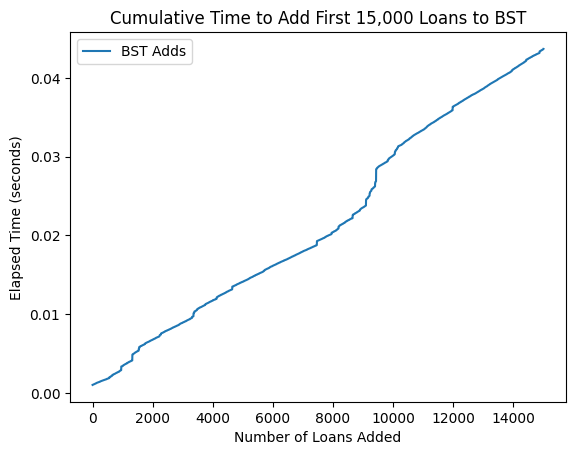

In [17]:
#Q6
counts = []
times  = []
tree_q6 = BST()
start = time.time()
for i, loan in enumerate(bankLCU.loan_list[:15_000], start=1):
    tree_q6.add(loan.interest_rate, loan)
    counts.append(i)
    times.append(time.time() - start)

fig, ax = plt.subplots()
ax.plot(counts, times, label="BST Adds")
ax.set_title("Cumulative Time to Add First 15,000 Loans to BST")
ax.set_xlabel("Number of Loans Added")
ax.set_ylabel("Elapsed Time (seconds)")
ax.legend()

# IMPORTANT -- Do not remove -- 
with open("Q6.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)


### Q7: How fast are tree lookups?

Create a bar plot with two bars:
1. time to find all `interest_rate` values equal to `1.99`, by looping over every loan and keeping a counter
2. time to compute `len(NAME_OF_YOUR_BST_OBJECT[1.99])`

*Note*: Both methods are calculating the same value: the amount of loans with an interest rate of 1.99. However, this value is not used anywhere in the graph, just the time that each method takes to find this value.

**_Make sure to include a title, and axis labels_**

<img src="img/q7.png" width="400px">

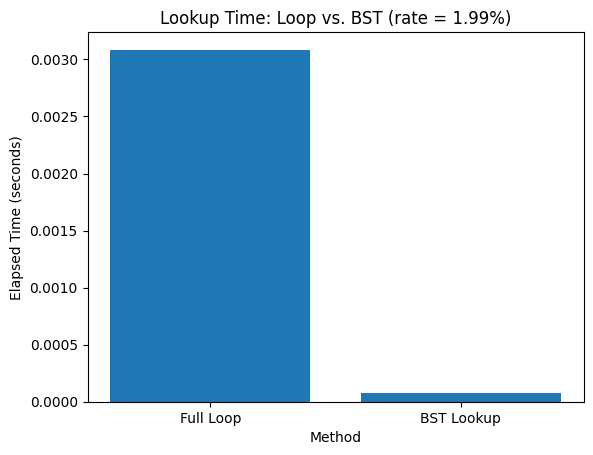

In [18]:
#Q7


start_loop = time.time()
count_loop = sum(1 for loan in bankLCU.loan_list if loan.interest_rate == 1.99)
time_loop  = time.time() - start_loop

start_bst = time.time()
count_bst = len(treeLCU[1.99])
time_bst  = time.time() - start_bst

assert count_loop == count_bst

fig, ax = plt.subplots()


methods = ["Full Loop", "BST Lookup"]
times   = [time_loop, time_bst]
ax.bar(methods, times)
ax.set_title("Lookup Time: Loop vs. BST (rate = 1.99%)")
ax.set_xlabel("Method")
ax.set_ylabel("Elapsed Time (seconds)")

# IMPORTANT -- Do not remove --
with open("Q7.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### Q8: What is the distribution of amount of racial identities across all applicants?

Answer with a bar graph. The x-axis should be the amount of racial identities
indicated by the applicant/co-applicant, while the y-axis should be the count
of applicants/co-applicants with the respective amount of racial identities.

It may be helpful to create a dictionary before you plot the values. If you do, the
corresponding values should be as follows:

```python
{0: 2639, 1: 24799, 2: 478, 3: 51, 4: 6}
```

**Note:** The x-axis should be the number of race identities selected by the applicants, not the individual races. (The height of the first bar represents how many applicants/co-applicants have 0 listed races)

**_Make sure to include a title, and axis labels_**

<img src="img/q8.png" width="400px">

Counter({1: 24799, 0: 2639, 2: 478, 3: 51, 4: 6})
[0, 1, 2, 3, 4]
[2639, 24799, 478, 51, 6]


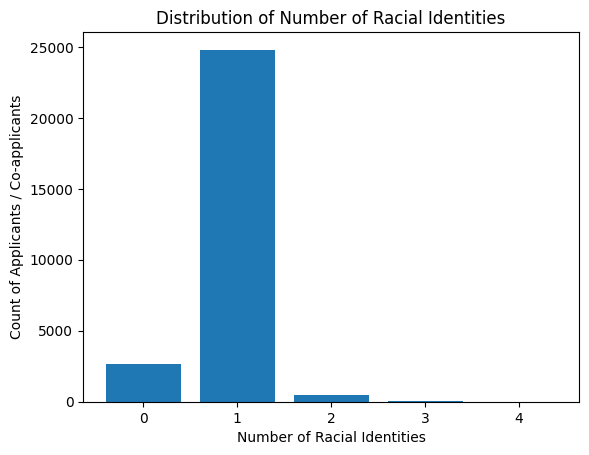

In [19]:
#Q8


race_counts = Counter(
    len(app.race)
    for loan in bankLCU.loan_list
    for app  in loan.applicants
)
print(race_counts)

fig, ax = plt.subplots()
x_vals = sorted(race_counts.keys())
print(x_vals)
y_vals = [race_counts[k] for k in x_vals]
print(y_vals)
ax.bar(x_vals, y_vals)
ax.set_title("Distribution of Number of Racial Identities")
ax.set_xlabel("Number of Racial Identities")
ax.set_ylabel("Count of Applicants / Co‑applicants")

# IMPORTANT -- Do not remove -- 
with open("Q8.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### Q9: How many leaf nodes are in the tree?

Write a recursive function or method to count the number of leaf nodes present in the given BST.


In [20]:
#Q9
treeLCU.countLeafNodes()

63

### Q10: What is the third largest interest rate in the Bank BST?

Write a **recursive** function or method that can return the top 3 (or N) keys for any subtree.

In [21]:
#Q10
top_3_rates = treeLCU.top_n(3)
third_largest = top_3_rates[-1]
third_largest

9.85

## <span style="color:red">Important:</span>
Make sure to follow these steps to submit the project
1. **Kernel > Restart Kernel and Run All Cells** and then save the notebook
2. Run `tester.py` to check your answers
3. Run the following commands from the terminal:
```
git status # make sure you are in the correct branch
git add <required files>
git commit -m "Some message"
git push
```
4. Once you've pushed your project to GitLab, **verify that the pipeline ran successfully**.
    * Build > Jobs > Select the latest commit hash > Check tester output
5. Create a **_merge request_** to submit the project
    * Code > Merge requests > New merge request